In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Anuj Verma\\Desktop\\icml_face_data.csv')

In [2]:
df.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# from keras.layers import Input,Dense,Conv2D, MaxPooling2D, UpSampling2D
# from keras.layers import Flatten, Reshape,Dropout
# from keras.models import Model, Sequential
# from keras import regularizers
# from keras.utils import to_categorical
# from keras.layers.normalization import BatchNormalization
# from numba import jit,cuda
from imblearn.over_sampling import SMOTE

C:\Users\Anuj Verma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Anuj Verma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Anuj Verma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and wil

In [6]:
train_data=[]
test_data=[]

In [7]:
for i in range(len(df)):
    s=df.iloc[i][2]
    type_file=df.iloc[i][1]
    a=s.split()
    map_object = map(int, a)
    array=list(map_object)
    if(type_file=='PublicTest' or type_file=='PrivateTest'):
        test_data.append(array)
    elif(type_file=='Training'):
        train_data.append(array)

train_data=np.array(train_data)
test_data=np.array(test_data)

train_labels=[]
test_labels=[]

for i in range(len(df)):
    s=df.iloc[i][0]
    type_file=df.iloc[i][1]
    if(type_file=='PublicTest' or type_file=='PrivateTest'):
        test_labels.append(s)
    elif(type_file=='Training'):
        train_labels.append(s)

def get_balanced_data(train_data,train_labels):
    oversample =SMOTE()  
    train_data, train_labels = oversample.fit_resample(train_data, train_labels)
    unique_elem,counts = np.unique(train_labels,return_counts=True)
    print(unique_elem)
    print(counts)
    return train_data,train_labels

train_data,train_labels = get_balanced_data(train_data,train_labels)

### train data is in train_data and test_data is in test_data 
##  train labels is in train_labels and testing labels is in test_labels

C:\Users\Anuj Verma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anuj Verma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anuj Verma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anuj Verma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  war

[0 1 2 3 4 5 6]
[7215 7215 7215 7215 7215 7215 7215]


In [8]:
import cv2
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import torch
import numpy as np
import torchvision.transforms as T
def decode_segmap(image, source, nc=21):
    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
    r = np.zeros_like(image).astype(np.uint8)
    #print(r.shape)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    for l in range(0, nc):
        idx = image == l
        #print(idx)
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
    
    rgb = np.stack([r, g, b], axis=2)
    # Load the foreground input image
    foreground = source
    # Change the color of foreground image to RGB
    # and resize image to match shape of R-band in RGB output map
    foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
    foreground = cv2.resize(foreground,(r.shape[1],r.shape[0]))

    # Create a background array to hold white pixels
    # with the same size as RGB output map
    background = 255 * np.ones_like(rgb).astype(np.uint8)

    # Convert uint8 to float
    foreground = foreground.astype(float)
    background = background.astype(float)

    # Create a binary mask of the RGB output map using the threshold value 0
    th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)

    # Apply a slight blur to the mask to soften edges
    alpha = cv2.GaussianBlur(alpha, (7,7),0)

    # Normalize the alpha mask to keep intensity between 0 and 1
    alpha = alpha.astype(float)/255

    # Multiply the foreground with the alpha matte
    foreground = cv2.multiply(alpha, foreground)

    # Multiply the background with ( 1 - alpha )
    background = cv2.multiply(1.0 - alpha, background)

    # Add the masked foreground and background
    outImage = cv2.add(foreground, background)

    # Return a normalized output image for display
    return outImage/255



In [9]:
def segment(net, path):
    #img = Image.open(path)
    img=Image.fromarray(path)
    #plt.imshow(img); plt.axis('off'); plt.show()
      # Comment the Resize and CenterCrop for better inference results
    trf = T.Compose([ T.ToTensor(), 
                       T.Normalize(mean = [0.485, 0.456, 0.406], 
                                   std = [0.229, 0.224, 0.225])])
    inp = trf(img).unsqueeze(0)
    out = net(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    rgb = decode_segmap(om,path)
    #print(rgb.shape)
    #plt.imshow(rgb); plt.axis('off'); plt.show()
    return rgb

In [10]:
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [11]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
train_images_rgb=[]
for i in range(10001,len(train_data)):
    gray=train_data[i].reshape(48,48)
    gray = np.array(gray, dtype=np.uint8)
    backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
    x=segment(fcn,backtorgb)
    #image_resized = misc.imresize(x, (48, 48,3))
    x=rgb2gray(x)
    train_images_rgb.append(x)

train_images_rgb=np.array(train_images_rgb)
train_images_rgb.shape


C:\Users\Anuj Verma\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


(40504, 48, 48)

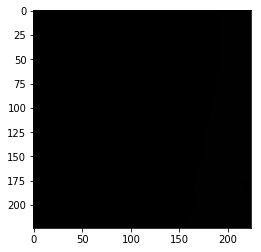

In [23]:
plt.imshow(train_images_rgb[0])

In [2]:
import h5py



OSError: Unable to open file (bad object header version number)

In [ ]:
train_images_rgb=np.array(train_images_rgb)

In [12]:
import h5py
h5_data="C:\\Users\\Anuj Verma\\Desktop\\data1.h5"
h5f_data = h5py.File(h5_data, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(train_images_rgb))


<HDF5 dataset "dataset_1": shape (40504, 48, 48), type "<f8">

In [15]:
h5f_data.close()

In [14]:
h5_data="C:\\Users\\Anuj Verma\\Desktop\\data1.h5"
h5f_data = h5py.File(h5_data, 'r')

In [ ]:
h5f_data.create_dataset('dataset_1', data=train_images_rgb)

In [1]:
plt.imshow(train_images_rgb[1])

NameError: name 'plt' is not defined